In [88]:
#From the console, run the following
#pip install numpy
#pip install scipy
#pip install scikit-learn
#pip install matplotlib

# Import required packages here (after they are installed)
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as mp
from pylab import show
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Load data. csv file should be in the same folder as the notebook for this to work, otherwise
# give data path.
data = np.loadtxt("data.csv")

In [89]:
#shuffle the data and select training and test data
np.random.seed(100)
np.random.shuffle(data)


features = []
digits = []


for row in data:
    #import the data and select only the 1's and 5's
    if(row[0]==1 or row[0]==5):
        features.append(row[1:])
        digits.append(str(row[0]))

        
#Select the proportion of data to use for training. 
#Notice that we have set aside 80% of the data for testing
numTrain = int(len(features)*.2)

trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]

#print(trainFeatures)
#trainFeatures[0]

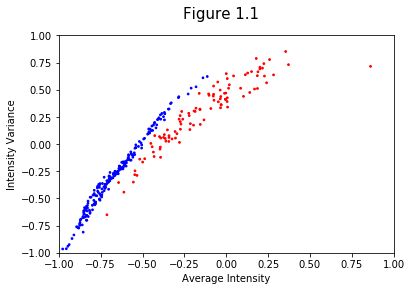

In [90]:
#Convert the 256D data (trainFeatures) to 2D data
#We need X and Y for plotting and simpleTrain for building the model.
#They contain the same points in a different arrangement

X = []
Y = []
simpleTrain = []

#Colors will be passed to the graphing library to color the points.
#1's are blue: "b" and 5's are red: "r"
colors = []
#legends = []
for index in range(len(trainFeatures)):
    #print(index)
    #break
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNew = 2*np.average(trainFeatures[index])+.75 
    yNew = 3*np.var(trainFeatures[index])-1.5
    X.append(xNew)
    Y.append(yNew)
    simpleTrain.append([xNew,yNew])
    #trainDigits will still be the value we try to classify. Here it is the string "1.0" or "5.0"
    if(trainDigits[index]=="1.0"):
        colors.append("b")
        #legends.append("1")
    else:
        colors.append("r")
        #legends.append("5")

#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(X,Y,s=3,c=colors)

#specify the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Labeling the plot
#mp.legend(['1'])
#mp.legend(legends)
fig.suptitle('Figure 1.1', fontsize=15)

#display the current graph
show()

# DECISON TREES

1a) DECISION TREES - maxleaf nodes

In [91]:
#create a new decision tree model

max_leaf_nodes_list = [5,10,15,20,30,40,50,75,100,200,500,1000,10000] 
decisiontree_models = []
cv_scores_list = []
cv_errors = []
# iterating each number in list 
for num in max_leaf_nodes_list: 
    dt_clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = num, random_state=0)
    decisiontree_models.append(dt_clf)

#train model with cv of 10 
for dt in decisiontree_models:
    cv_scores = cross_val_score(dt, simpleTrain, trainDigits, cv=10)
    cv_scores_list.append(cv_scores)

#print each cv score (accuracy) and average them
for i in range(len(max_leaf_nodes_list)):
    print('Max leaf nodes:', max_leaf_nodes_list[i])
    print(decisiontree_models[i])
    print(cv_scores_list[i])
    print('cv_scores mean:{}'.format(np.mean(cv_scores_list[i])))
    error = 1-np.mean(cv_scores_list[i])
    cv_errors.append(error)
    print('Cross validation error:', error)

Max leaf nodes: 5
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
[0.9375     0.875      0.9375     1.         0.80645161 0.80645161
 0.87096774 0.90322581 0.93548387 0.83333333]
cv_scores mean:0.8905913978494624
Cross validation error: 0.1094086021505376
Max leaf nodes: 10
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       r

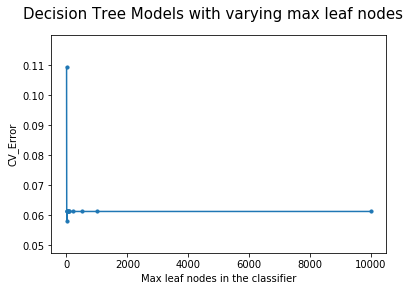

In [92]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(max_leaf_nodes_list,cv_errors,s=10)
mp.plot(max_leaf_nodes_list,cv_errors)

#specify the axes
mp.xlabel("Max leaf nodes in the classifier")
mp.ylabel("CV_Error")

#Labeling the plot
fig.suptitle('Decision Tree Models with varying max leaf nodes', fontsize=15)

#display the current graph
show()

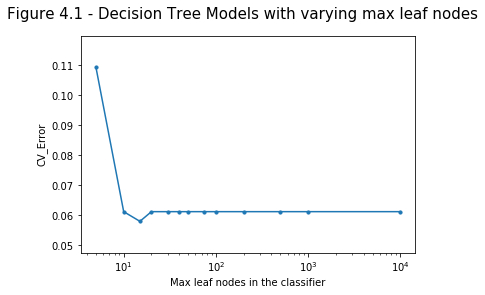

In [93]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(max_leaf_nodes_list,cv_errors,s=10)
mp.xscale('log')
mp.plot(max_leaf_nodes_list,cv_errors)

#specify the axes
mp.xlabel("Max leaf nodes in the classifier")
mp.ylabel("CV_Error")

#Labeling the plot
fig.suptitle('Figure 4.1 - Decision Tree Models with varying max leaf nodes', fontsize=15)

#display the current graph
show()


1b) Evidence of overfitting or underfitting

In [94]:
#depth of the tree
depth = []
leaves = []
path = []

for dt in decisiontree_models:
    dt.fit(simpleTrain,trainDigits)
    dpt = dt.get_depth()
    depth.append(dpt)
    lfs = dt.get_n_leaves()
    leaves.append(lfs)
    pth = dt.decision_path(simpleTrain)
    path.append(pth)

print("Depth:", depth)
print("Leaves:", leaves)

Depth: [3, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Leaves: [5, 10, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


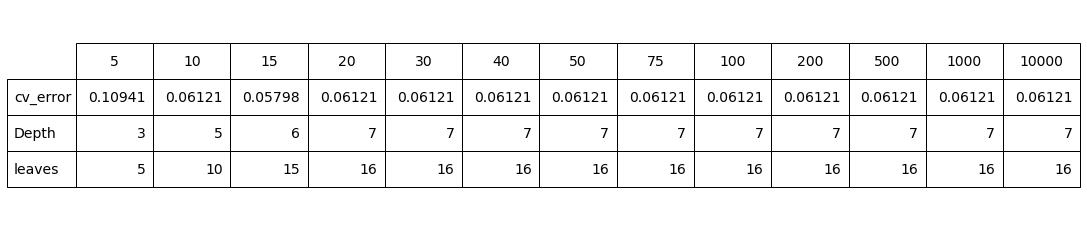

In [95]:
#table
figb_t = mp.figure()
table_vals_b = []

np_array = np.array(cv_errors)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals_b.append(round_to_tenths)

np_array = np.array(depth)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals_b.append(round_to_tenths)

np_array = np.array(leaves)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals_b.append(round_to_tenths)

row_labels = ['cv_error', 'Depth', 'leaves']
col_labels = max_leaf_nodes_list
the_table = mp.table(cellText=table_vals_b,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(3,3)

# Removing ticks and spines enables you to get the figure only with table
mp.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mp.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    mp.gca().spines[pos].set_visible(False)
mp.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)


#display the current graph
mp.show()

In [96]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Declare Model
model = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 10000, random_state=0)
# Fit model to our data
model.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

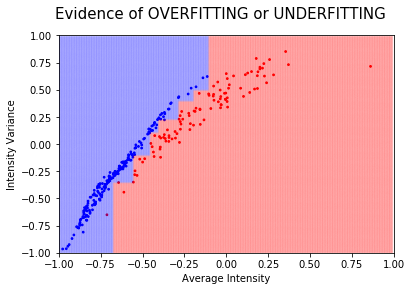

In [97]:
## Visualize Results
#plot the points
fig = mp.figure()
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Label the figure
fig.suptitle('Evidence of OVERFITTING or UNDERFITTING', fontsize=15)
show()

1b) ANSWER: Even though we have max leaf nodes till 10,000, the actual leaf nodes were only 16 at max. From the 4th model i.e., max leaf nodes = 20, all the trees had same depth and same leaf nodes. So we can say that from max leaf nodes 20, there can be a chance of overfitting since the model has reached maximum depth and can lead to overfitting. Similarly we can see that the cross validation errors are also increasing and similar.

1c) 2D REGION FOR OPTIMAL DECISION TREE MODEL

In [98]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Declare Model
model = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 15, random_state=0)
# Fit model to our data
model.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

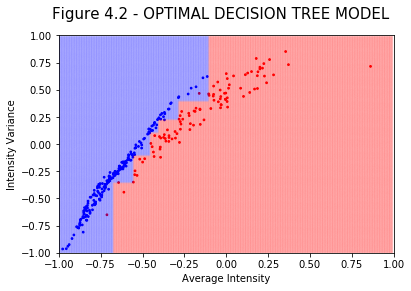

In [99]:
## Visualize Results
#plot the points
fig = mp.figure()
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Label the figure
fig.suptitle('Figure 4.2 - OPTIMAL DECISION TREE MODEL', fontsize=15)
show()

1c) ANSWER: The optimal model I have choosen is for max leaf nodes with 15. This trees actual leaf nodes in the model were 15 and the depth of the tree was 6 and it has the lowest cross validation error.

1d) GRADUATE STUDENT QUESTION - min impurity decrease & min impurity split

In [100]:
#create a new decision tree model - min impurity decrease

min_impurity_decrease_list = [0,0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] 
decisiontree_models = []
cv_scores_list = []
cv_errors = []
# iterating each number in list 
for imp in min_impurity_decrease_list: 
    dt_clf = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=imp, random_state=0)
    decisiontree_models.append(dt_clf)

#train model with cv of 10 
for dt in decisiontree_models:
    cv_scores = cross_val_score(dt, simpleTrain, trainDigits, cv=10)
    cv_scores_list.append(cv_scores)

#print each cv score (accuracy) and average them
for i in range(len(min_impurity_decrease_list)):
    print('Min impurity decrease value:', min_impurity_decrease_list[i])
    print(decisiontree_models[i])
    print(cv_scores_list[i])
    print('cv_scores mean:{}'.format(np.mean(cv_scores_list[i])))
    error = 1-np.mean(cv_scores_list[i])
    cv_errors.append(error)
    print('Cross validation error:', error)

Min impurity decrease value: 0
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
[0.9375     0.96875    0.96875    0.96774194 0.83870968 0.87096774
 1.         1.         0.96774194 0.9       ]
cv_scores mean:0.9420161290322581
Cross validation error: 0.057983870967741935
Min impurity decrease value: 0.0001
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, p

In [101]:
#depth of the tree
depth = []
leaves = []
path = []

for dt in decisiontree_models:
    dt.fit(simpleTrain,trainDigits)
    dpt = dt.get_depth()
    depth.append(dpt)
    lfs = dt.get_n_leaves()
    leaves.append(lfs)
    pth = dt.decision_path(simpleTrain)
    path.append(pth)

print("Depth:", depth)
print("Leaves:", leaves)

Depth: [7, 7, 7, 5, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
Leaves: [16, 16, 16, 12, 6, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]


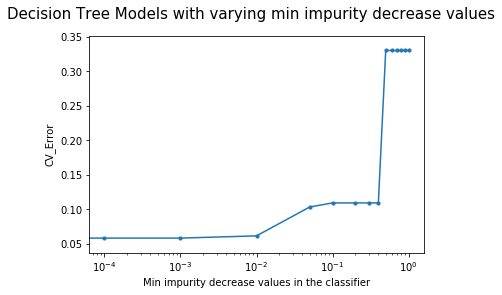

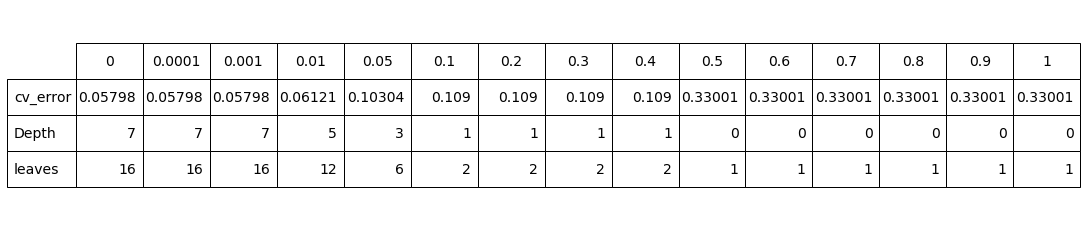

In [102]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(min_impurity_decrease_list,cv_errors,s=10)
mp.xscale('log')
mp.plot(min_impurity_decrease_list,cv_errors)

#specify the axes
mp.xlabel("Min impurity decrease values in the classifier")
mp.ylabel("CV_Error")

#Labeling the plot
fig.suptitle('Decision Tree Models with varying min impurity decrease values', fontsize=15)


#table
figb_t = mp.figure()
table_vals_b = []

np_array = np.array(cv_errors)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals_b.append(round_to_tenths)

np_array = np.array(depth)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals_b.append(round_to_tenths)

np_array = np.array(leaves)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals_b.append(round_to_tenths)

row_labels = ['cv_error', 'Depth', 'leaves']
col_labels = min_impurity_decrease_list
the_table = mp.table(cellText=table_vals_b,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(3,3)

# Removing ticks and spines enables you to get the figure only with table
mp.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mp.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    mp.gca().spines[pos].set_visible(False)
mp.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)


#display the current graph
mp.show()


In [111]:
#create a new decision tree model - min impurity split

min_impurity_split_list = [0,0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] 
decisiontree_models = []
cv_scores_list = []
cv_errors = []
# iterating each number in list 
for imp in min_impurity_split_list: 
    dt_clf = DecisionTreeClassifier(criterion='entropy', min_impurity_split=imp, random_state=0)
    decisiontree_models.append(dt_clf)

#train model with cv of 10 
for dt in decisiontree_models:
    cv_scores = cross_val_score(dt, simpleTrain, trainDigits, cv=10)
    cv_scores_list.append(cv_scores)

#print each cv score (accuracy) and average them
for i in range(len(min_impurity_split_list)):
    print('Min impurity split value:', min_impurity_split_list[i])
    print(decisiontree_models[i])
    print(cv_scores_list[i])
    print('cv_scores mean:{}'.format(np.mean(cv_scores_list[i])))
    error = 1-np.mean(cv_scores_list[i])
    cv_errors.append(error)
    print('Cross validation error:', error)

C:\Users\Anu\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Anu\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Anu\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Anu\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impur

Min impurity split value: 0
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
[0.9375     0.96875    0.96875    0.96774194 0.83870968 0.87096774
 1.         1.         0.96774194 0.9       ]
cv_scores mean:0.9420161290322581
Cross validation error: 0.057983870967741935
Min impurity split value: 0.0001
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.0001,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=F

C:\Users\Anu\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Anu\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Anu\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Anu\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impur

In [112]:
#depth of the tree
depth = []
leaves = []
path = []

for dt in decisiontree_models:
    dt.fit(simpleTrain,trainDigits)
    dpt = dt.get_depth()
    depth.append(dpt)
    lfs = dt.get_n_leaves()
    leaves.append(lfs)
    pth = dt.decision_path(simpleTrain)
    path.append(pth)

print("Depth:", depth)
print("Leaves:", leaves)

Depth: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 0]
Leaves: [16, 16, 16, 16, 16, 16, 12, 12, 8, 8, 8, 2, 2, 2, 1]


C:\Users\Anu\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Anu\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Anu\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Anu\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impur

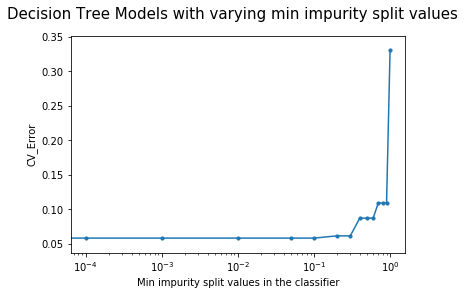

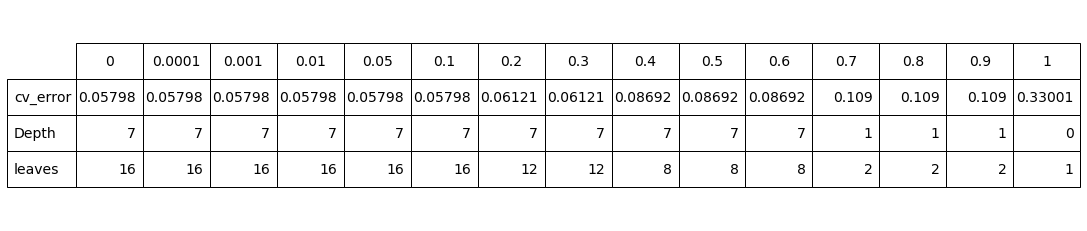

In [113]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(min_impurity_split_list,cv_errors,s=10)
mp.xscale('log')
mp.plot(min_impurity_split_list,cv_errors)

#specify the axes
mp.xlabel("Min impurity split values in the classifier")
mp.ylabel("CV_Error")

#Labeling the plot
fig.suptitle('Decision Tree Models with varying min impurity split values', fontsize=15)


#table
figb_t = mp.figure()
table_vals_b = []

np_array = np.array(cv_errors)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals_b.append(round_to_tenths)

np_array = np.array(depth)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals_b.append(round_to_tenths)

np_array = np.array(leaves)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals_b.append(round_to_tenths)

row_labels = ['cv_error', 'Depth', 'leaves']
col_labels = min_impurity_split_list
the_table = mp.table(cellText=table_vals_b,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(3,3)

# Removing ticks and spines enables you to get the figure only with table
mp.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mp.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    mp.gca().spines[pos].set_visible(False)
mp.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)


#display the current graph
mp.show()


Answer: The optimal values as per cross validation errors for min impurity decrease are 0, 0.0001, 0.001 and are similar for min impurity split since both of them almost explain the same thing. But if we want to reduce overfitting, we need to introduce some amount of impurity in the nodes. So for min impurity decrease the optimal value can be 0.001 if we want least impurity or we can consider 0.001 which has cross validation error as 0.06121 that can reduce both the depth and overfitting in the classifier which can reduce variance.
Here, considering 0.1 as 'min impurity decrease' would underfit the data so much since the depth and leaves produced are just 1 and 2. So this means data is classified as either one side or the other. So, we cannot choose this value as this underfits the data and similarly for other values from there on.
Similarly min impurity split can be considered as '0.1' as this has the lowest cross validation error and also doesn't underfit the data.

# RANDOM FORESTS

### 1e) PART 1 : RANDOM FORESTS - max leaf nodes = 10

In [91]:
#create a new decision tree model

n_estimators_list = [5,10,15,20,30,40,50,75,100,200,500,1000,10000] 
randomforests_models = []
cv_scores_list = []
cv_errors = []
# iterating each number in list 
for num in n_estimators_list: 
    rf_clf = RandomForestClassifier(n_estimators=num, max_leaf_nodes = 10, random_state=0)
    randomforests_models.append(rf_clf)

#train model with cv of 10 
for rf in randomforests_models:
    cv_scores = cross_val_score(rf, simpleTrain, trainDigits, cv=10)
    cv_scores_list.append(cv_scores)

#print each cv score (accuracy) and average them
for i in range(len(n_estimators_list)):
    print('n estimators:', n_estimators_list[i])
    print(randomforests_models[i])
    print(cv_scores_list[i])
    print('cv_scores mean:{}'.format(np.mean(cv_scores_list[i])))
    error = 1-np.mean(cv_scores_list[i])
    cv_errors.append(error)
    print('Cross validation error:', error)

n estimators: 5
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
[0.96875    0.9375     0.90625    0.96774194 0.83870968 0.90322581
 0.96774194 1.         0.96774194 0.86666667]
cv_scores mean:0.9324327956989247
Cross validation error: 0.06756720430107532
n estimators: 10
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2

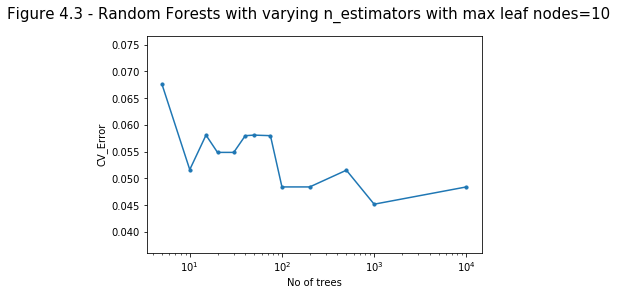

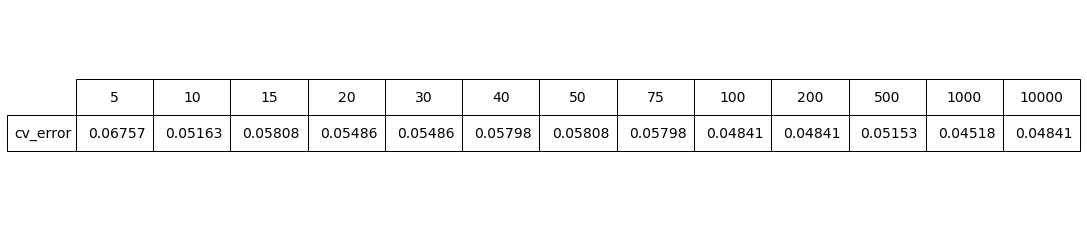

In [93]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(n_estimators_list,cv_errors,s=10)
mp.xscale('log')
mp.plot(n_estimators_list,cv_errors)

#specify the axes
mp.xlabel("No of trees")
mp.ylabel("CV_Error")

#Labeling the plot
fig.suptitle('Figure 4.3 - Random Forests with varying n_estimators with max leaf nodes=10', fontsize=15)

#table
figb_t = mp.figure()
table_vals_b = []

np_array = np.array(cv_errors)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals_b.append(round_to_tenths)

row_labels = ['cv_error']
col_labels = n_estimators_list
the_table = mp.table(cellText=table_vals_b,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(3,3)

# Removing ticks and spines enables you to get the figure only with table
mp.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mp.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    mp.gca().spines[pos].set_visible(False)
mp.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)


#display the current graph
mp.show()


### 1e) PART 2 : RANDOM FORESTS - max leaf nodes = 100

In [94]:
#create a new decision tree model

n_estimators_list = [5,10,15,20,30,40,50,75,100,200,500,1000,10000] 
randomforests_models = []
cv_scores_list = []
cv_errors = []
# iterating each number in list 
for num in n_estimators_list: 
    rf_clf = RandomForestClassifier(n_estimators=num, max_leaf_nodes = 100, random_state=0)
    randomforests_models.append(rf_clf)

#train model with cv of 10 
for rf in randomforests_models:
    cv_scores = cross_val_score(rf, simpleTrain, trainDigits, cv=10)
    cv_scores_list.append(cv_scores)

#print each cv score (accuracy) and average them
for i in range(len(n_estimators_list)):
    print('n estimators:', n_estimators_list[i])
    print(randomforests_models[i])
    print(cv_scores_list[i])
    print('cv_scores mean:{}'.format(np.mean(cv_scores_list[i])))
    error = 1-np.mean(cv_scores_list[i])
    cv_errors.append(error)
    print('Cross validation error:', error)

n estimators: 5
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
[0.96875    1.         0.96875    0.96774194 0.87096774 0.93548387
 1.         1.         0.96774194 0.86666667]
cv_scores mean:0.9546102150537635
Cross validation error: 0.04538978494623647
n estimators: 10
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split

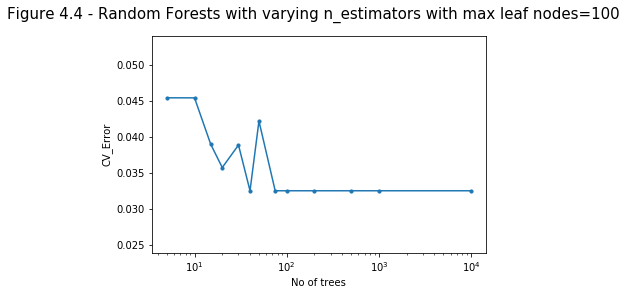

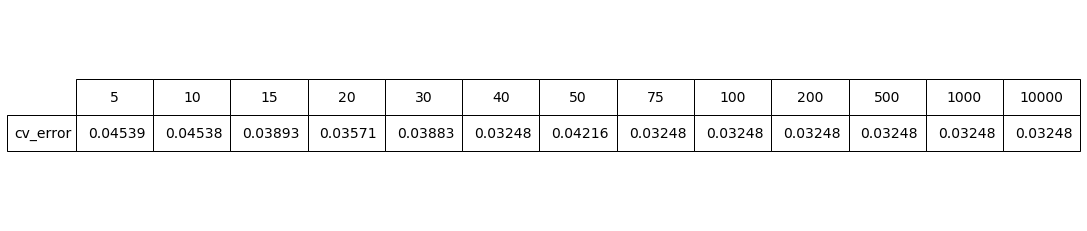

In [95]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(n_estimators_list,cv_errors,s=10)
mp.xscale('log')
mp.plot(n_estimators_list,cv_errors)

#specify the axes
mp.xlabel("No of trees")
mp.ylabel("CV_Error")

#Labeling the plot
fig.suptitle('Figure 4.4 - Random Forests with varying n_estimators with max leaf nodes=100', fontsize=15)

#table
figb_t = mp.figure()
table_vals_b = []

np_array = np.array(cv_errors)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals_b.append(round_to_tenths)

row_labels = ['cv_error']
col_labels = n_estimators_list
the_table = mp.table(cellText=table_vals_b,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(3,3)

# Removing ticks and spines enables you to get the figure only with table
mp.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mp.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    mp.gca().spines[pos].set_visible(False)
mp.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)


#display the current graph
mp.show()


### 1e) PART 3 : RANDOM FORESTS - max leaf nodes = 1000

In [96]:
#create a new decision tree model

n_estimators_list = [5,10,15,20,30,40,50,75,100,200,500,1000,10000] 
randomforests_models = []
cv_scores_list = []
cv_errors = []
# iterating each number in list 
for num in n_estimators_list: 
    rf_clf = RandomForestClassifier(n_estimators=num, max_leaf_nodes = 1000, random_state=0)
    randomforests_models.append(rf_clf)

#train model with cv of 10 
for rf in randomforests_models:
    cv_scores = cross_val_score(rf, simpleTrain, trainDigits, cv=10)
    cv_scores_list.append(cv_scores)

#print each cv score (accuracy) and average them
for i in range(len(n_estimators_list)):
    print('n estimators:', n_estimators_list[i])
    print(randomforests_models[i])
    print(cv_scores_list[i])
    print('cv_scores mean:{}'.format(np.mean(cv_scores_list[i])))
    error = 1-np.mean(cv_scores_list[i])
    cv_errors.append(error)
    print('Cross validation error:', error)

n estimators: 5
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
[0.96875    1.         0.96875    0.96774194 0.87096774 0.93548387
 1.         1.         0.96774194 0.86666667]
cv_scores mean:0.9546102150537635
Cross validation error: 0.04538978494623647
n estimators: 10
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_spl

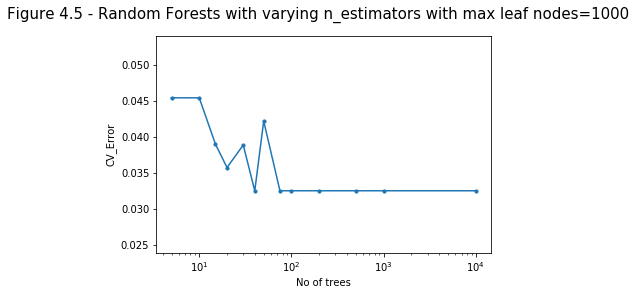

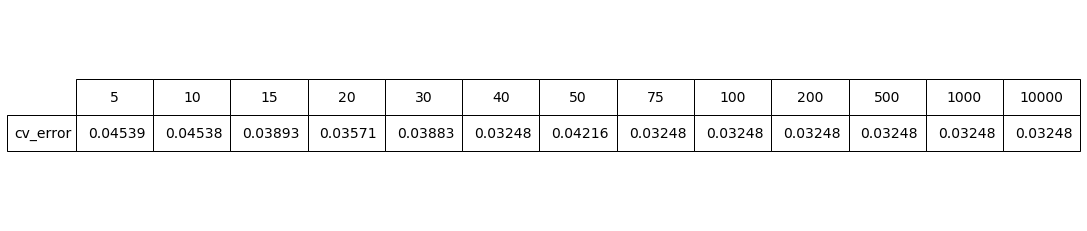

In [97]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(n_estimators_list,cv_errors,s=10)
mp.xscale('log')
mp.plot(n_estimators_list,cv_errors)

#specify the axes
mp.xlabel("No of trees")
mp.ylabel("CV_Error")

#Labeling the plot
fig.suptitle('Figure 4.5 - Random Forests with varying n_estimators with max leaf nodes=1000', fontsize=15)

#table
figb_t = mp.figure()
table_vals_b = []

np_array = np.array(cv_errors)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals_b.append(round_to_tenths)

row_labels = ['cv_error']
col_labels = n_estimators_list
the_table = mp.table(cellText=table_vals_b,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(3,3)

# Removing ticks and spines enables you to get the figure only with table
mp.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mp.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    mp.gca().spines[pos].set_visible(False)
mp.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)


#display the current graph
mp.show()


### 1f) Max leaf nodes - Most impacted by bagging

The max leaf nodes with 10 has been most impacted by the bagging approach. The max leaf nodes for 100 and 1000 do not have much impact after the n_estimators reach 75. 
If max_leaf nodes is less, there is a high chance of having different decision trees that give different results in each bag of n_estimators. This is because the depth is limited and we might not able able to reach the end solution with perfect class labels and hence the results might vary.
But if we see for 100 and 1000 max leaf nodes, the results don't vary much after n_estimators reach 75 i.e., the cross validation errors are same. This might be because the trees are fully grown and fully grown trees in all bags are able to predict data similarly than half grown trees which can yield varying results. 

### 1g) N Estimators - Impact

Even though we find that the graph vary much with n_estimators, in real there is actually very slight difference between them and the difference reduces more as we reach higher values of n_estimators. But we can say that as n_estimators increase and reach a ceratin point, the cross validation errors donot change much. Yes, there was a point were n_estimators didn't have effect that is after n_estimators = 75 for both 100 and 1000 max_leaf_nodes. This is beacuse, once we build certain maximum nuber of trees, we reach a point were the different possible trees are built and including more trees doesn't change our results. This holds even more true if the max leaf nodes count is more.

### 1h) Optimal model - Random forests

In [200]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Declare Model
model = RandomForestClassifier(n_estimators=75, max_leaf_nodes=100, random_state=0, n_jobs=-1)
# Fit model to our data
model.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

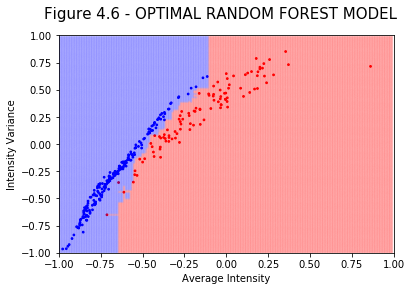

In [201]:
## Visualize Results
#plot the points
fig = mp.figure()
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Label the figure
fig.suptitle('Figure 4.6 - OPTIMAL RANDOM FOREST MODEL', fontsize=15)
show()

Answer: The optimal Model for Random forest I've taken as max_leaf_nodes = 100 and n_estimators = 200. Max leaf nodes 100 and 1000 have same results and hence I've choosen 100 as the value. Having more leaf nodes can increase the depth and overfit the model (even though it's not the case here)so I chose 100 as an optimal value. And n_estimators from 75 till 10000 have same values. Having more number of bags doesn't overfit the model in bagging. But having too many bags(i.e., n_estimators) can increase the run_time. So I've taken 200 as an optimal value between 75 and 10000.

### 1i) Random forests - Max features

In [193]:
#create a new decision tree model

max_leaf_nodes = [10,100,1000]
n_estimators_list = [1,10,100,100] 
max_features = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
models = []
actual_max_leaf_nodes = []
actual_n_estimators = []
actual_max_features = []
randomforests_models = []
cv_scores_list = []
cv_errors = []
# iterating each number in list
for leaf in max_leaf_nodes:
    for estimator in n_estimators_list: 
        for feature in max_features: 
            rf_clf = RandomForestClassifier(max_leaf_nodes = leaf, n_estimators=estimator, max_features= feature, random_state=0)
            randomforests_models.append(rf_clf)
            actual_max_leaf_nodes.append(leaf)
            actual_n_estimators.append(estimator)
            actual_max_features.append(feature)

#train model with cv of 10 
for rf in randomforests_models:
    models.append(randomforests_models.index(rf))
    cv_scores = cross_val_score(rf, simpleTrain, trainDigits, cv=10)
    cv_scores_list.append(cv_scores)

#print each cv score (accuracy) and average them
for i in range(len(randomforests_models)):
    print(randomforests_models[i])
    print(cv_scores_list[i])
    print('cv_scores mean:{}'.format(np.mean(cv_scores_list[i])))
    error = 1-np.mean(cv_scores_list[i])
    cv_errors.append(error)
    print('Cross validation error:', error)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.1, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
[0.96875    1.         0.875      0.96774194 0.90322581 0.90322581
 0.96774194 0.93548387 0.96774194 0.86666667]
cv_scores mean:0.9355577956989247
Cross validation error: 0.06444220430107528
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.2, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fra

In [194]:
import pandas as pd
features_list = pd.DataFrame(
    {'cv_errors': cv_errors,
     'actual_max_leaf_nodes': actual_max_leaf_nodes,
     'actual_n_estimators': actual_n_estimators,
     'actual_max_features': actual_max_features
    })
features_list

,cv_errors,actual_max_leaf_nodes,actual_n_estimators,actual_max_features
0,0.064442,10,1,0.1
1,0.064442,10,1,0.2
2,0.064442,10,1,0.3
3,0.064442,10,1,0.4
4,0.064442,10,1,0.5
5,0.064442,10,1,0.6
6,0.064442,10,1,0.7
7,0.064442,10,1,0.8
8,0.064442,10,1,0.9
9,0.051633,10,1,1.0


In [199]:
i = min(cv_errors)
index = cv_errors.index(i)
print(i)
print(index)
features_list.iloc[index]

0.03247983870967741
60


cv_errors                  0.03248
actual_max_leaf_nodes    100.00000
actual_n_estimators      100.00000
actual_max_features        0.10000
Name: 60, dtype: float64

The lowest cross validation error occured at max_leaf_nodes = 100, n_estimators = 100, max_features = 0.1

# ADABOOST

### 1j) ADABOOST CLASSIFIER - DecisionTreeClassifier(max_depth=1)

In [20]:
#create a new decision tree model

n_estimators_list = [1,5,10,100,1000,10000] 
adaboost_models = []
cv_scores_list = []
cv_errors = []
# iterating each number in list 
for num in n_estimators_list: 
    ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=num, random_state=0)
    adaboost_models.append(ada_clf)

#train model with cv of 10 
for ada in adaboost_models:
    cv_scores = cross_val_score(ada, simpleTrain, trainDigits, cv=10)
    cv_scores_list.append(cv_scores)

#print each cv score (accuracy) and average them
for i in range(len(n_estimators_list)):
    print('n estimators:', n_estimators_list[i])
    print(adaboost_models[i])
    print(cv_scores_list[i])
    print('cv_scores mean:{}'.format(np.mean(cv_scores_list[i])))
    error = 1-np.mean(cv_scores_list[i])
    cv_errors.append(error)
    print('Cross validation error:', error)

n estimators: 1
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
             

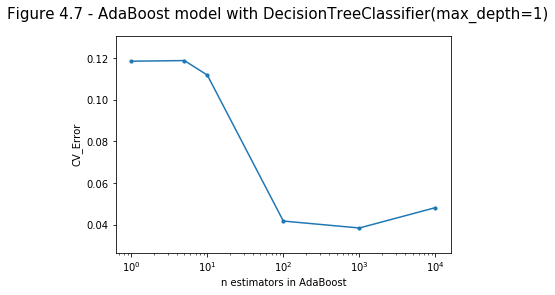

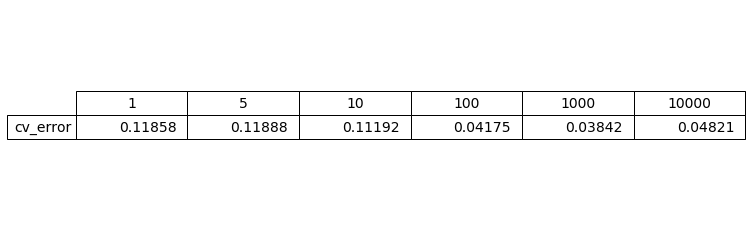

In [22]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(n_estimators_list,cv_errors,s=10)
mp.xscale('log')
mp.plot(n_estimators_list,cv_errors)

#specify the axes
mp.xlabel("n estimators in AdaBoost")
mp.ylabel("CV_Error")

#Labeling the plot
fig.suptitle('Figure 4.7 - AdaBoost model with DecisionTreeClassifier(max_depth=1)', fontsize=15)

#table
figb_t = mp.figure()
table_vals_b = []

np_array = np.array(cv_errors)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals_b.append(round_to_tenths)

row_labels = ['cv_error']
col_labels = n_estimators_list
the_table = mp.table(cellText=table_vals_b,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(2,2)

# Removing ticks and spines enables you to get the figure only with table
mp.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mp.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    mp.gca().spines[pos].set_visible(False)
mp.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)


#display the current graph
mp.show()

### 1k) ADABOOST CLASSIFIER - DecisionTreeClassifier(max_depth=10)

In [23]:
#create a new decision tree model

n_estimators_list = [1,5,10,100,1000,10000] 
adaboost_models = []
cv_scores_list = []
cv_errors = []
# iterating each number in list 
for num in n_estimators_list: 
    ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=num, random_state=0)
    adaboost_models.append(ada_clf)

#train model with cv of 10 
for ada in adaboost_models:
    cv_scores = cross_val_score(ada, simpleTrain, trainDigits, cv=10)
    cv_scores_list.append(cv_scores)

#print each cv score (accuracy) and average them
for i in range(len(n_estimators_list)):
    print('n estimators:', n_estimators_list[i])
    print(adaboost_models[i])
    print(cv_scores_list[i])
    print('cv_scores mean:{}'.format(np.mean(cv_scores_list[i])))
    error = 1-np.mean(cv_scores_list[i])
    cv_errors.append(error)
    print('Cross validation error:', error)

n estimators: 1
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
            

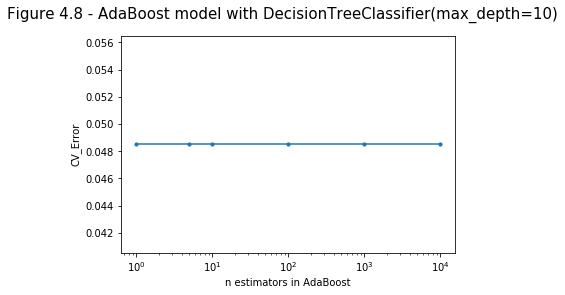

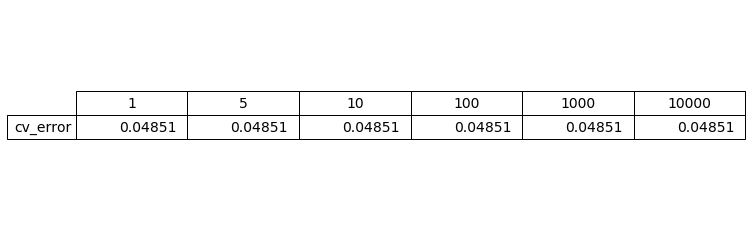

In [24]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(n_estimators_list,cv_errors,s=10)
mp.xscale('log')
mp.plot(n_estimators_list,cv_errors)

#specify the axes
mp.xlabel("n estimators in AdaBoost")
mp.ylabel("CV_Error")

#Labeling the plot
fig.suptitle('Figure 4.8 - AdaBoost model with DecisionTreeClassifier(max_depth=10)', fontsize=15)

#table
figb_t = mp.figure()
table_vals_b = []

np_array = np.array(cv_errors)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals_b.append(round_to_tenths)

row_labels = ['cv_error']
col_labels = n_estimators_list
the_table = mp.table(cellText=table_vals_b,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(2,2)

# Removing ticks and spines enables you to get the figure only with table
mp.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mp.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    mp.gca().spines[pos].set_visible(False)
mp.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)


#display the current graph
mp.show()

### 1l) ADABOOST CLASSIFIER - DecisionTreeClassifier(max_depth=1000)

In [25]:
#create a new decision tree model

n_estimators_list = [1,5,10,100,1000,10000] 
adaboost_models = []
cv_scores_list = []
cv_errors = []
# iterating each number in list 
for num in n_estimators_list: 
    ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1000), n_estimators=num, random_state=0)
    adaboost_models.append(ada_clf)

#train model with cv of 10 
for ada in adaboost_models:
    cv_scores = cross_val_score(ada, simpleTrain, trainDigits, cv=10)
    cv_scores_list.append(cv_scores)

#print each cv score (accuracy) and average them
for i in range(len(n_estimators_list)):
    print('n estimators:', n_estimators_list[i])
    print(adaboost_models[i])
    print(cv_scores_list[i])
    print('cv_scores mean:{}'.format(np.mean(cv_scores_list[i])))
    error = 1-np.mean(cv_scores_list[i])
    cv_errors.append(error)
    print('Cross validation error:', error)

n estimators: 1
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1000,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
          

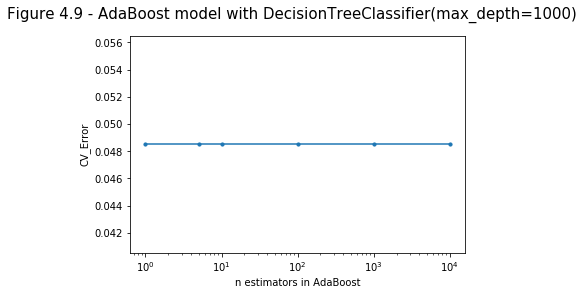

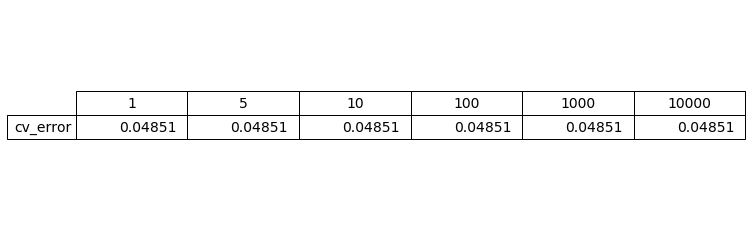

In [26]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(n_estimators_list,cv_errors,s=10)
mp.xscale('log')
mp.plot(n_estimators_list,cv_errors)

#specify the axes
mp.xlabel("n estimators in AdaBoost")
mp.ylabel("CV_Error")

#Labeling the plot
fig.suptitle('Figure 4.9 - AdaBoost model with DecisionTreeClassifier(max_depth=1000)', fontsize=15)

#table
figb_t = mp.figure()
table_vals_b = []

np_array = np.array(cv_errors)
np_round_to_tenths = np.around(np_array, 5)
round_to_tenths = list(np_round_to_tenths)
table_vals_b.append(round_to_tenths)

row_labels = ['cv_error']
col_labels = n_estimators_list
the_table = mp.table(cellText=table_vals_b,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(2,2)

# Removing ticks and spines enables you to get the figure only with table
mp.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mp.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    mp.gca().spines[pos].set_visible(False)
mp.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)


#display the current graph
mp.show()

### 1m) Optimal model decision region - ADABOOST

In [27]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Declare Model
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=1000, random_state=0)
# Fit model to our data
model.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

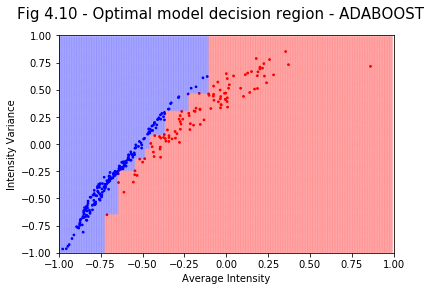

In [30]:
## Visualize Results
#plot the points
fig = mp.figure()
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Label the figure
fig.suptitle('Fig 4.10 - Optimal model decision region - ADABOOST', fontsize=15)
show()

Answer: Optimal decision region plotted above is for base estimator = DecisionTreeClassifier(max_depth=1) and n_estimators=1000. The graph plotted above also suggests there is no overfitting and underfitting occurence.

# 2. REPORTING FINAL ERROR

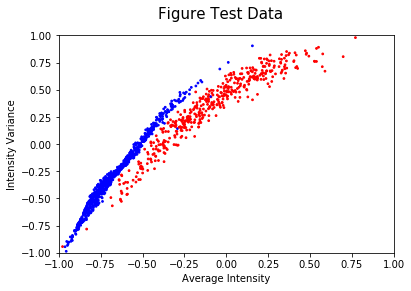

In [136]:
#Convert the 256D data (testFeatures) to 2D data
#We need X and Y for plotting and simpleTest for testing the model.
#They contain the same points in a different arrangement

X_t = []
Y_t = []
simpleTest = []

#Colors will be passed to the graphing library to color the points.
#1's are blue: "b" and 5's are red: "r"
t_colors = []
#legends = []
for index in range(len(testFeatures)):
    #print(index)
    #break
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNew = 2*np.average(testFeatures[index])+.75 
    yNew = 3*np.var(testFeatures[index])-1.5
    X_t.append(xNew)
    Y_t.append(yNew)
    simpleTest.append([xNew,yNew])
    #trainDigits will still be the value we try to classify. Here it is the string "1.0" or "5.0"
    if(testDigits[index]=="1.0"):
        t_colors.append("b")
        #legends.append("1")
    else:
        t_colors.append("r")
        #legends.append("5")

#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(X_t,Y_t,s=3,c=t_colors)

#specify the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Labeling the plot
#mp.legend(['1'])
#mp.legend(legends)
fig.suptitle('Figure Test Data', fontsize=15)

#display the current graph
show()

### Polynomial SVM

In [137]:
from sklearn.svm import SVC

#### Optimal Model 

In [138]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Declare Model
model = SVC(C=2, gamma='scale', kernel='poly', degree=3)
# Fit model to our data
model.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

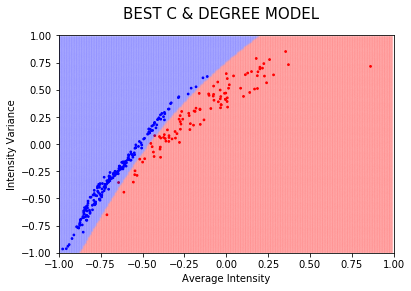

In [139]:
## Visualize Results
#plot the points
fig = mp.figure()
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Label the figure
fig.suptitle('BEST C & DEGREE MODEL', fontsize=15)
show()

In [140]:
#model = SVC(C=2, gamma='scale', kernel='poly', degree=3)
cv_scores = cross_val_score(model, simpleTrain, trainDigits, cv=10)
print(cv_scores)
print(cv_scores.mean())

[1.         1.         1.         1.         0.96774194 1.
 1.         1.         0.96774194 1.        ]
0.9935483870967742


#### Testing data results with the above best model

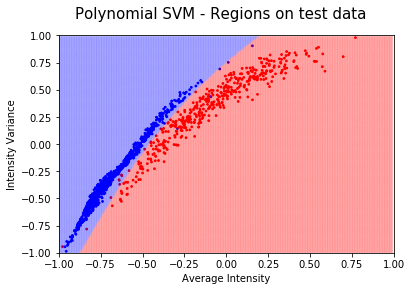

In [141]:
## Visualize Results
#plot the points
fig = mp.figure()
mp.scatter(X_t,Y_t,s=3,c=t_colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Label the figure
fig.suptitle('Polynomial SVM - Regions on test data', fontsize=15)
show()

In [142]:
score = model.score(simpleTest, testDigits)
svm_error = 1-score
print(score)
print(svm_error)

0.9855884707766213
0.014411529223378738


Answer: The optimal model I've choosen for Polynomial SVM is "SVC(C=2, gamma='scale', kernel='poly', degree=3)" with degree 3 and c = 2 which has a cross validation score of 0.9935. I have used this model on the entire test data and obtained a score of 0.9855 which is a very good score for the model above.
Since the testing data and the training data in 2D have similar trends as we see from the above graph plots, the testing data performed well on the model too.

### Neural Network

In [143]:
from sklearn.neural_network import MLPClassifier

#### Optimal Model

In [144]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Declare Model
model = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50), activation='relu', early_stopping=False, solver='adam', alpha=0, max_iter=10000, epsilon=0.001)
# Fit model to our data
model.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

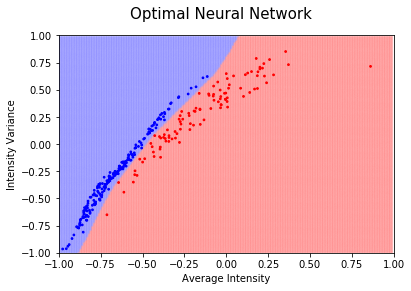

In [145]:
## Visualize Results
#plot the points
fig = mp.figure()
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Label the figure
fig.suptitle('Optimal Neural Network', fontsize=15)
show()

In [146]:
#model = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50), activation='relu', early_stopping=False, solver='adam', alpha=0, max_iter=10000, epsilon=0.001)
cv_scores = cross_val_score(model, simpleTrain, trainDigits, cv=10)
print(cv_scores)
print(cv_scores.mean())

[1.         1.         1.         1.         0.96774194 1.
 1.         1.         0.96774194 1.        ]
0.9935483870967742


#### Testing data results for the above optimal Neural Network model

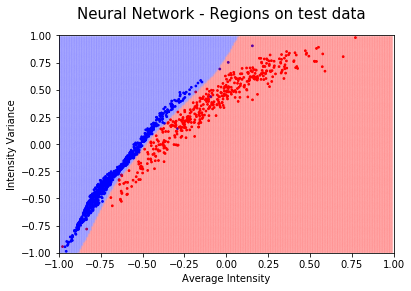

In [147]:
## Visualize Results
#plot the points
fig = mp.figure()
mp.scatter(X_t,Y_t,s=3,c=t_colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Label the figure
fig.suptitle('Neural Network - Regions on test data', fontsize=15)
show()

In [148]:
score = model.score(simpleTest, testDigits)
nn_error = 1-score
print(score)
print(nn_error)

0.9919935948759008
0.008006405124099225


Answer: The optimal model I've choosen for Polynomial SVM is with hidden_layers=5 with 50 nodes and with relu as it's activation function. This model has a cross validation score of 0.99677. I have used this model on the entire test data and obtained a score of 0.99199 which is a very good score for the model above and has better performance than SVM.
Since the testing data and the training data in 2D have similar trends as we see from the above graph plots, the testing data performed well on the model too.

### RANDOM FORESTS

In [149]:
from sklearn.ensemble import RandomForestRegressor

#### Optimal model

In [150]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Declare Model
model = RandomForestClassifier(n_estimators=75, max_leaf_nodes=100, random_state=0)
# Fit model to our data
model.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

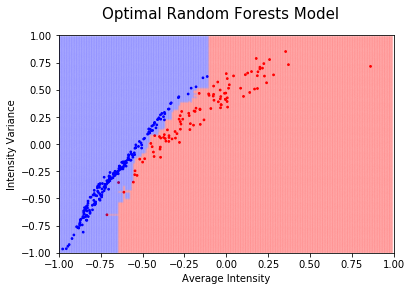

In [151]:
## Visualize Results
#plot the points
fig = mp.figure()
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Label the figure
fig.suptitle('Optimal Random Forests Model', fontsize=15)
show()

In [152]:
#model = RandomForestRegressor(n_estimators=n, max_leaf_nodes = 10, random_state=0)
cv_scores = cross_val_score(model, simpleTrain, trainDigits, cv=10)
print(cv_scores)
print(cv_scores.mean())

[1.         0.96875    1.         0.96774194 0.90322581 0.96774194
 1.         1.         0.96774194 0.9       ]
0.9675201612903226


#### Testing data results for above Random forest optimal model

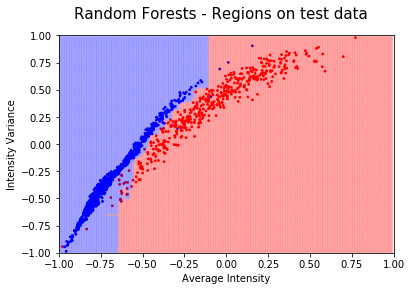

In [153]:
## Visualize Results
#plot the points
fig = mp.figure()
mp.scatter(X_t,Y_t,s=3,c=t_colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Label the figure
fig.suptitle('Random Forests - Regions on test data', fontsize=15)
show()

In [154]:
score = model.score(simpleTest, testDigits)
rf_error = 1-score
print(score)
print(rf_error)

0.9759807846277022
0.024019215372297786


Answer: Answer: The optimal model I've choosen for Random Forests is with max_leaf_nodes=100 and n_estimators=75. This model has a cross validation score of 0.96752 on the training data. I have used this model on the entire test data and obtained a score of 0.97598 which is a very good score for the model but has a slightly less performance than polynomial SVM and Neural Networks.
Since the testing data and the training data in 2D have almost similar trends but mssed few points in the rectilinear decision boundaries and that's why has a slightly less performance. But overall the model does a weel job.

### ADABOOST

In [155]:
from sklearn.ensemble import AdaBoostClassifier

#### Optimal Model

In [156]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Declare Model
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=1000, random_state=0)
# Fit model to our data
model.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

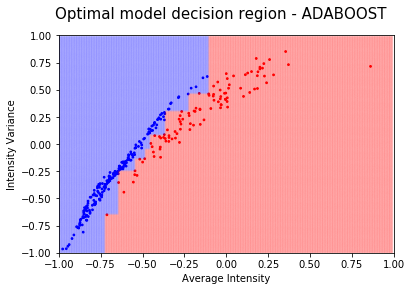

In [157]:
## Visualize Results
#plot the points
fig = mp.figure()
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Label the figure
fig.suptitle('Optimal model decision region - ADABOOST', fontsize=15)
show()

In [158]:
#model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=1000, random_state=0)
cv_scores = cross_val_score(model, simpleTrain, trainDigits, cv=10)
print(cv_scores)
print(cv_scores.mean())

[0.96875    0.96875    0.90625    0.96774194 0.96774194 0.93548387
 1.         1.         0.96774194 0.93333333]
0.9615793010752689


#### Testing data results for above optimal Adaboost model

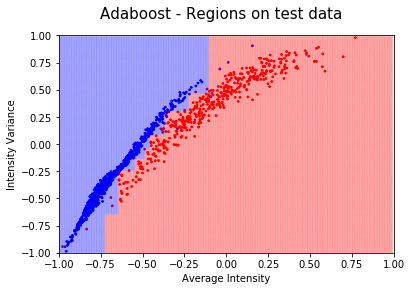

In [159]:
## Visualize Results
#plot the points
fig = mp.figure()
mp.scatter(X_t,Y_t,s=3,c=t_colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Label the figure
fig.suptitle('Adaboost - Regions on test data', fontsize=15)
show()

In [160]:
score = model.score(simpleTest, testDigits)
ada_error = 1-score
print(score)
print(ada_error)

0.9743795036028823
0.02562049639711772


Answer: The optimal model I've choosen for Adaboost is with DecisionTreeClassifier(max_depth=1) as base estimator and n_estimators=1000. This model has a highest cross validation score of 0.96157 on the training data. I have used this model on the entire test data and obtained a score of 0.97437 which is a very good score for the model.
Since the testing data and the training data in 2D have almost similar trends but mssed few points in the rectilinear decision boundaries. But overall the model does a well job.
We can also say that the random forests and Adaboost have performed well on test data than training data. This shows how they can reduce variance without decreasing bias.

## CONCENTRATION BOUNDS

In [177]:
import math

### Markov Bound

In [178]:
def markov(test_error, confidence_interval):
    prob = (100 - confidence_interval)/100
    a = test_error/prob
    return a

### Chebyshev Bound

In [183]:
def chebyshev(test_samples, confidence_interval):
    prob = (100 - confidence_interval)/100
    a = math.sqrt(1/(4*test_samples*prob))
    return a

### Hoeffding Bound

In [190]:
def hoeffding(test_samples, confidence_interval):
    prob = (100 - confidence_interval)/100
    a = math.sqrt(np.log(2/prob)/(2*test_samples))
    return a

In [181]:
test_length = len(simpleTest)
print(test_length)

1249


#### Markov Bounds for all 4 models with all confidence levels

In [166]:
confidence_intervals = [75, 95, 99]
svm_B = []
nn_B = []
rf_B = []
ada_B = []
for ci in confidence_intervals:
    svm_B.append(markov(svm_error, ci))
    nn_B.append(markov(nn_error, ci))
    rf_B.append(markov(rf_error, ci))
    ada_B.append(markov(ada_error, ci))

In [169]:
markov_bounds_list = pd.DataFrame(
    {'Confidence Intervals': confidence_intervals,
     'SVM Model': svm_B,
     'Neural Network Model': nn_B,
     'Random Forests Model': rf_B,
     'Ada Boost Model': ada_B
    })
markov_bounds_list

,Confidence Intervals,SVM Model,Neural Network Model,Random Forests Model,Ada Boost Model
0,75,0.057646,0.032026,0.096077,0.102482
1,95,0.288231,0.160128,0.480384,0.512410
2,99,1.441153,0.800641,2.401922,2.562050


#### Chebyshev Bounds for all 4 models with all confidence levels

In [184]:
confidence_intervals = [75, 95, 99]
svm_B = []
nn_B = []
rf_B = []
ada_B = []
for ci in confidence_intervals:
    svm_B.append(chebyshev(test_length, ci))
    nn_B.append(chebyshev(test_length, ci))
    rf_B.append(chebyshev(test_length, ci))
    ada_B.append(chebyshev(test_length, ci))

In [185]:
chebyshev_bounds_list = pd.DataFrame(
    {'Confidence Intervals': confidence_intervals,
     'SVM Model': svm_B,
     'Neural Network Model': nn_B,
     'Random Forests Model': rf_B,
     'Ada Boost Model': ada_B
    })
chebyshev_bounds_list

,Confidence Intervals,SVM Model,Neural Network Model,Random Forests Model,Ada Boost Model
0,75,0.028296,0.028296,0.028296,0.028296
1,95,0.063271,0.063271,0.063271,0.063271
2,99,0.141478,0.141478,0.141478,0.141478


#### Hoeffding Bounds for all 4 models with all confidence levels

In [191]:
confidence_intervals = [75, 95, 99]
svm_B = []
nn_B = []
rf_B = []
ada_B = []
for ci in confidence_intervals:
    svm_B.append(hoeffding(test_length, ci))
    nn_B.append(hoeffding(test_length, ci))
    rf_B.append(hoeffding(test_length, ci))
    ada_B.append(hoeffding(test_length, ci))

In [192]:
hoeffding_bounds_list = pd.DataFrame(
    {'Confidence Intervals': confidence_intervals,
     'SVM Model': svm_B,
     'Neural Network Model': nn_B,
     'Random Forests Model': rf_B,
     'Ada Boost Model': ada_B
    })
hoeffding_bounds_list

,Confidence Intervals,SVM Model,Neural Network Model,Random Forests Model,Ada Boost Model
0,75,0.028852,0.028852,0.028852,0.028852
1,95,0.038428,0.038428,0.038428,0.038428
2,99,0.046055,0.046055,0.046055,0.046055


2a) Answer: With respect to Markov bounds, Random forests and Adaboost changed dramatically followed by Polynomial SVM. The change in Neural Networks bounds is the least with respect to the change in confidence intervals. These(Markov) bounds are mostly effected by the test_error obtained in the models. Since neural networks has least error, the effect is also low. Since random forests and Adaboost has higher test errors, the bounds are largely effected by the confidence intervals.
Chebyshev and Hoeffding are dependent on the number of  test samples, the bounds are same for all the models since all the models have same number of test samples.

2b) I would choose neural networks since the training error and test error are very low i.e., this model has low bias and low variance which is optimal. And also, the concentration bounds are also very low. Since we always want to have low variance in the error and the neural network model has lowest error with low concentration bounds wrt confidence intervals, I would choose this model. 
i.e., We want to  have lowest test_error(+/-)councentration bounds, neural networks is optimal here. 

2c) Yes, the markov bounds given an idea about the range of whole test error that we can have. Even though the bounds cannot give perfect answers, they give any idea about the model upper and lower limits to the test error. Also, chebyshev and hoeffding bounds given an idea about the whole test error with respect to the test data samples. They explain that as test data increases, the overall test error(Eout) value can decrease since the bounds decrease too.